# <center> Tuning Neural Networks

## <center> Optimizers

### SGD - Stochastic Gradient Descent
- Simplest optimizer
- Static learning rate


###  AdaGrad - Adaptive Gradients
- Different learning rate for each feature
- Learning rates tend to approach zero after a few batches

### RMSProp - Root Mean Square Propagation
- Similar to AdaGrad
- Less aggressively decreases learning rates

### Adam - Adaptive Moment Estimation
- Uses a history of gradients in addition to methods of RMSProp and AdaGrad
- Fast convergence, often the best choice

## <center>Learning Rate

- Larger learning rates train quickly but often failed to reach global minimums
- Smaller learning rates train slowly but more often succed at reaching global minimums
- Usually the default learning rate on an optimizer can work well
- Values between 0.0001 and 0.01 are most common (usually incremented in powers of 5 or 10)

## <center> Batch Size

- Batch size is the number of training samples utilized in one iteration
- Weights are updated after each batch
- Larger batch sizes take more time/resources to converge, can usally find global optima, but can lead to overfitting
- Smaller batch sizes are faster and can generalize well to unseen data, but can be noisy and get stuck in local optima
- Usually there is a sweet spot that avoids overfitting/underfitting
- 32 is a good starting place
- Try powers of 2 (8,16,32,64,128,256,512)

## <center> Noise

- Noise layers can be added to the input or between layers to help prevent overfitting and make the network more robust
- https://keras.io/layers/noise/
- https://analyticsindiamag.com/improving-deep-learning-model-robustness-by-adding-noise-using-keras/

## <center> Regularization

- L1 and L2 regularization (Lasso and Ridge) can be applied to the weights of any layer in Keras 
- This penalizes large weights and helps to prevent overfitting
- kernel_regularizer(applied to weights)
- bias_regularizer(applied to bias unit)
- activity_regularizer(applied to layer activation)
- https://keras.io/regularizers/

## <center> Dropout

- Dropout layers randomly ignore a fraction of the input neurons 
- Dropout stops the network from relying heavily on a single feature
- Helps to prevent overfitting

## <center> Early Stopping

- Early stopping can be used to prevent a network from over training

In [2]:
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=2000, verbose=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

C:\Users\Matthew\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Matthew\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Matthew\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Matthew\Anaconda3\lib\site-packages\tensorflow\python\fr

Train on 30 samples, validate on 70 samples
Epoch 1/2000
30/30 [==============================] - 2s 61ms/step - loss: 0.6748 - acc: 0.8000 - val_loss: 0.6789 - val_acc: 0.6143
Epoch 2/2000
30/30 [==============================] - 0s 266us/step - loss: 0.6633 - acc: 0.8000 - val_loss: 0.6706 - val_acc: 0.6143
Epoch 3/2000
30/30 [==============================] - 0s 266us/step - loss: 0.6503 - acc: 0.8000 - val_loss: 0.6620 - val_acc: 0.6429
Epoch 4/2000
30/30 [==============================] - 0s 266us/step - loss: 0.6369 - acc: 0.8667 - val_loss: 0.6534 - val_acc: 0.6429
Epoch 5/2000
30/30 [==============================] - 0s 240us/step - loss: 0.6234 - acc: 0.8667 - val_loss: 0.6450 - val_acc: 0.6571
Epoch 6/2000
30/30 [==============================] - 0s 233us/step - loss: 0.6100 - acc: 0.8667 - val_loss: 0.6367 - val_acc: 0.6857
Epoch 7/2000
30/30 [==============================] - 0s 299us/step - loss: 0.5967 - acc: 0.8333 - val_loss: 0.6286 - val_acc: 0.6857
Epoch 8/2000
30/30 

Epoch 62/2000
30/30 [==============================] - 0s 266us/step - loss: 0.2344 - acc: 0.9000 - val_loss: 0.4557 - val_acc: 0.7286
Epoch 63/2000
30/30 [==============================] - 0s 233us/step - loss: 0.2323 - acc: 0.9000 - val_loss: 0.4548 - val_acc: 0.7286
Epoch 64/2000
30/30 [==============================] - 0s 233us/step - loss: 0.2302 - acc: 0.9000 - val_loss: 0.4540 - val_acc: 0.7286
Epoch 65/2000
30/30 [==============================] - 0s 233us/step - loss: 0.2283 - acc: 0.9000 - val_loss: 0.4532 - val_acc: 0.7429
Epoch 66/2000
30/30 [==============================] - 0s 233us/step - loss: 0.2264 - acc: 0.9000 - val_loss: 0.4524 - val_acc: 0.7429
Epoch 67/2000
30/30 [==============================] - 0s 266us/step - loss: 0.2246 - acc: 0.9000 - val_loss: 0.4516 - val_acc: 0.7429
Epoch 68/2000
30/30 [==============================] - 0s 233us/step - loss: 0.2228 - acc: 0.9000 - val_loss: 0.4508 - val_acc: 0.7429
Epoch 69/2000
30/30 [==============================] - 

Epoch 123/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1730 - acc: 0.9333 - val_loss: 0.4082 - val_acc: 0.8000
Epoch 124/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1724 - acc: 0.9333 - val_loss: 0.4074 - val_acc: 0.8143
Epoch 125/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1719 - acc: 0.9333 - val_loss: 0.4067 - val_acc: 0.8143
Epoch 126/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1713 - acc: 0.9333 - val_loss: 0.4059 - val_acc: 0.8143
Epoch 127/2000
30/30 [==============================] - 0s 199us/step - loss: 0.1708 - acc: 0.9333 - val_loss: 0.4051 - val_acc: 0.8143
Epoch 128/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1702 - acc: 0.9333 - val_loss: 0.4043 - val_acc: 0.8143
Epoch 129/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1697 - acc: 0.9333 - val_loss: 0.4035 - val_acc: 0.8143
Epoch 130/2000
30/30 [==========================

Epoch 184/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1481 - acc: 0.9667 - val_loss: 0.3725 - val_acc: 0.8286
Epoch 185/2000
30/30 [==============================] - 0s 199us/step - loss: 0.1479 - acc: 0.9667 - val_loss: 0.3722 - val_acc: 0.8286
Epoch 186/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1476 - acc: 0.9667 - val_loss: 0.3719 - val_acc: 0.8286
Epoch 187/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1474 - acc: 0.9667 - val_loss: 0.3717 - val_acc: 0.8286
Epoch 188/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1471 - acc: 0.9667 - val_loss: 0.3714 - val_acc: 0.8286
Epoch 189/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1469 - acc: 0.9667 - val_loss: 0.3712 - val_acc: 0.8286
Epoch 190/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1466 - acc: 0.9667 - val_loss: 0.3710 - val_acc: 0.8286
Epoch 191/2000
30/30 [==========================

Epoch 245/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1376 - acc: 0.9667 - val_loss: 0.3683 - val_acc: 0.8143
Epoch 246/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1375 - acc: 0.9667 - val_loss: 0.3684 - val_acc: 0.8143
Epoch 247/2000
30/30 [==============================] - 0s 200us/step - loss: 0.1374 - acc: 0.9667 - val_loss: 0.3684 - val_acc: 0.8143
Epoch 248/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1373 - acc: 0.9667 - val_loss: 0.3684 - val_acc: 0.8143
Epoch 249/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1372 - acc: 0.9667 - val_loss: 0.3685 - val_acc: 0.8143
Epoch 250/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1371 - acc: 0.9667 - val_loss: 0.3685 - val_acc: 0.8143
Epoch 251/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1370 - acc: 0.9667 - val_loss: 0.3686 - val_acc: 0.8143
Epoch 252/2000
30/30 [==========================

Epoch 306/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1314 - acc: 0.9667 - val_loss: 0.3689 - val_acc: 0.8429
Epoch 307/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1313 - acc: 0.9667 - val_loss: 0.3688 - val_acc: 0.8429
Epoch 308/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1312 - acc: 0.9667 - val_loss: 0.3687 - val_acc: 0.8429
Epoch 309/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1311 - acc: 0.9667 - val_loss: 0.3686 - val_acc: 0.8429
Epoch 310/2000
30/30 [==============================] - 0s 332us/step - loss: 0.1310 - acc: 0.9667 - val_loss: 0.3684 - val_acc: 0.8429
Epoch 311/2000
30/30 [==============================] - 0s 366us/step - loss: 0.1309 - acc: 0.9667 - val_loss: 0.3683 - val_acc: 0.8429
Epoch 312/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1308 - acc: 0.9667 - val_loss: 0.3682 - val_acc: 0.8429
Epoch 313/2000
30/30 [==========================

Epoch 367/2000
30/30 [==============================] - 0s 399us/step - loss: 0.1244 - acc: 0.9667 - val_loss: 0.3620 - val_acc: 0.8429
Epoch 368/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1242 - acc: 0.9667 - val_loss: 0.3618 - val_acc: 0.8429
Epoch 369/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1241 - acc: 0.9667 - val_loss: 0.3617 - val_acc: 0.8429
Epoch 370/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1240 - acc: 0.9667 - val_loss: 0.3615 - val_acc: 0.8429
Epoch 371/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1238 - acc: 0.9667 - val_loss: 0.3613 - val_acc: 0.8429
Epoch 372/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1237 - acc: 0.9667 - val_loss: 0.3612 - val_acc: 0.8429
Epoch 373/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1236 - acc: 0.9667 - val_loss: 0.3610 - val_acc: 0.8429
Epoch 374/2000
30/30 [==========================

Epoch 428/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1150 - acc: 0.9667 - val_loss: 0.3475 - val_acc: 0.8429
Epoch 429/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1148 - acc: 0.9667 - val_loss: 0.3472 - val_acc: 0.8429
Epoch 430/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1146 - acc: 0.9667 - val_loss: 0.3469 - val_acc: 0.8429
Epoch 431/2000
30/30 [==============================] - 0s 332us/step - loss: 0.1144 - acc: 0.9667 - val_loss: 0.3465 - val_acc: 0.8429
Epoch 432/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1142 - acc: 0.9667 - val_loss: 0.3461 - val_acc: 0.8429
Epoch 433/2000
30/30 [==============================] - 0s 332us/step - loss: 0.1141 - acc: 0.9667 - val_loss: 0.3456 - val_acc: 0.8429
Epoch 434/2000
30/30 [==============================] - 0s 366us/step - loss: 0.1139 - acc: 0.9667 - val_loss: 0.3452 - val_acc: 0.8429
Epoch 435/2000
30/30 [==========================

Epoch 489/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1015 - acc: 0.9667 - val_loss: 0.3228 - val_acc: 0.8429
Epoch 490/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1013 - acc: 0.9667 - val_loss: 0.3224 - val_acc: 0.8429
Epoch 491/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1011 - acc: 0.9667 - val_loss: 0.3220 - val_acc: 0.8429
Epoch 492/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1008 - acc: 0.9667 - val_loss: 0.3216 - val_acc: 0.8429
Epoch 493/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1006 - acc: 0.9667 - val_loss: 0.3211 - val_acc: 0.8429
Epoch 494/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1003 - acc: 0.9667 - val_loss: 0.3207 - val_acc: 0.8429
Epoch 495/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1001 - acc: 0.9667 - val_loss: 0.3202 - val_acc: 0.8429
Epoch 496/2000
30/30 [==========================

Epoch 550/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0858 - acc: 0.9667 - val_loss: 0.2935 - val_acc: 0.8857
Epoch 551/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0855 - acc: 0.9667 - val_loss: 0.2931 - val_acc: 0.8857
Epoch 552/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0852 - acc: 0.9667 - val_loss: 0.2926 - val_acc: 0.8857
Epoch 553/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0850 - acc: 0.9667 - val_loss: 0.2920 - val_acc: 0.8857
Epoch 554/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0847 - acc: 0.9667 - val_loss: 0.2914 - val_acc: 0.8857
Epoch 555/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0844 - acc: 0.9667 - val_loss: 0.2908 - val_acc: 0.8857
Epoch 556/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0842 - acc: 0.9667 - val_loss: 0.2903 - val_acc: 0.8857
Epoch 557/2000
30/30 [==========================

Epoch 611/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0690 - acc: 0.9667 - val_loss: 0.2659 - val_acc: 0.9000
Epoch 612/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0687 - acc: 0.9667 - val_loss: 0.2655 - val_acc: 0.9000
Epoch 613/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0684 - acc: 0.9667 - val_loss: 0.2651 - val_acc: 0.9000
Epoch 614/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0682 - acc: 0.9667 - val_loss: 0.2647 - val_acc: 0.9000
Epoch 615/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0679 - acc: 0.9667 - val_loss: 0.2643 - val_acc: 0.9000
Epoch 616/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0676 - acc: 0.9667 - val_loss: 0.2640 - val_acc: 0.9000
Epoch 617/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0673 - acc: 0.9667 - val_loss: 0.2636 - val_acc: 0.9000
Epoch 618/2000
30/30 [==========================

Epoch 672/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0535 - acc: 0.9667 - val_loss: 0.2452 - val_acc: 0.9286
Epoch 673/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0533 - acc: 0.9667 - val_loss: 0.2449 - val_acc: 0.9286
Epoch 674/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0531 - acc: 0.9667 - val_loss: 0.2446 - val_acc: 0.9286
Epoch 675/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0529 - acc: 0.9667 - val_loss: 0.2444 - val_acc: 0.9286
Epoch 676/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0526 - acc: 0.9667 - val_loss: 0.2441 - val_acc: 0.9286
Epoch 677/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0524 - acc: 0.9667 - val_loss: 0.2438 - val_acc: 0.9286
Epoch 678/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0522 - acc: 0.9667 - val_loss: 0.2436 - val_acc: 0.9286
Epoch 679/2000
30/30 [==========================

Epoch 733/2000
30/30 [==============================] - 0s 332us/step - loss: 0.0409 - acc: 1.0000 - val_loss: 0.2342 - val_acc: 0.9286
Epoch 734/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0407 - acc: 1.0000 - val_loss: 0.2341 - val_acc: 0.9286
Epoch 735/2000
30/30 [==============================] - 0s 199us/step - loss: 0.0405 - acc: 1.0000 - val_loss: 0.2339 - val_acc: 0.9286
Epoch 736/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0403 - acc: 1.0000 - val_loss: 0.2338 - val_acc: 0.9286
Epoch 737/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0402 - acc: 1.0000 - val_loss: 0.2337 - val_acc: 0.9286
Epoch 738/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0400 - acc: 1.0000 - val_loss: 0.2336 - val_acc: 0.9286
Epoch 739/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0398 - acc: 1.0000 - val_loss: 0.2335 - val_acc: 0.9286
Epoch 740/2000
30/30 [==========================

Epoch 794/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0312 - acc: 1.0000 - val_loss: 0.2303 - val_acc: 0.9286
Epoch 795/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0311 - acc: 1.0000 - val_loss: 0.2303 - val_acc: 0.9286
Epoch 796/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0309 - acc: 1.0000 - val_loss: 0.2303 - val_acc: 0.9286
Epoch 797/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0308 - acc: 1.0000 - val_loss: 0.2303 - val_acc: 0.9286
Epoch 798/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0307 - acc: 1.0000 - val_loss: 0.2303 - val_acc: 0.9286
Epoch 799/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0305 - acc: 1.0000 - val_loss: 0.2303 - val_acc: 0.9286
Epoch 800/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0304 - acc: 1.0000 - val_loss: 0.2303 - val_acc: 0.9286
Epoch 801/2000
30/30 [==========================

Epoch 855/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0240 - acc: 1.0000 - val_loss: 0.2333 - val_acc: 0.9429
Epoch 856/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0239 - acc: 1.0000 - val_loss: 0.2334 - val_acc: 0.9429
Epoch 857/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0238 - acc: 1.0000 - val_loss: 0.2335 - val_acc: 0.9429
Epoch 858/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0237 - acc: 1.0000 - val_loss: 0.2336 - val_acc: 0.9429
Epoch 859/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0236 - acc: 1.0000 - val_loss: 0.2336 - val_acc: 0.9429
Epoch 860/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0235 - acc: 1.0000 - val_loss: 0.2337 - val_acc: 0.9429
Epoch 861/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0234 - acc: 1.0000 - val_loss: 0.2338 - val_acc: 0.9429
Epoch 862/2000
30/30 [==========================

Epoch 916/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0187 - acc: 1.0000 - val_loss: 0.2414 - val_acc: 0.9429
Epoch 917/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0186 - acc: 1.0000 - val_loss: 0.2416 - val_acc: 0.9429
Epoch 918/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0185 - acc: 1.0000 - val_loss: 0.2419 - val_acc: 0.9429
Epoch 919/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0185 - acc: 1.0000 - val_loss: 0.2421 - val_acc: 0.9429
Epoch 920/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0184 - acc: 1.0000 - val_loss: 0.2423 - val_acc: 0.9429
Epoch 921/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0183 - acc: 1.0000 - val_loss: 0.2425 - val_acc: 0.9429
Epoch 922/2000
30/30 [==============================] - 0s 332us/step - loss: 0.0182 - acc: 1.0000 - val_loss: 0.2427 - val_acc: 0.9429
Epoch 923/2000
30/30 [==========================

Epoch 977/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0146 - acc: 1.0000 - val_loss: 0.2530 - val_acc: 0.9429
Epoch 978/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0145 - acc: 1.0000 - val_loss: 0.2532 - val_acc: 0.9429
Epoch 979/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0145 - acc: 1.0000 - val_loss: 0.2533 - val_acc: 0.9429
Epoch 980/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0144 - acc: 1.0000 - val_loss: 0.2534 - val_acc: 0.9429
Epoch 981/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0143 - acc: 1.0000 - val_loss: 0.2536 - val_acc: 0.9429
Epoch 982/2000
30/30 [==============================] - 0s 199us/step - loss: 0.0143 - acc: 1.0000 - val_loss: 0.2537 - val_acc: 0.9429
Epoch 983/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0142 - acc: 1.0000 - val_loss: 0.2538 - val_acc: 0.9429
Epoch 984/2000
30/30 [==========================

Epoch 1037/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0116 - acc: 1.0000 - val_loss: 0.2620 - val_acc: 0.9429
Epoch 1038/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0116 - acc: 1.0000 - val_loss: 0.2622 - val_acc: 0.9429
Epoch 1039/2000
30/30 [==============================] - 0s 332us/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.2624 - val_acc: 0.9429
Epoch 1040/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.2625 - val_acc: 0.9429
Epoch 1041/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.2627 - val_acc: 0.9429
Epoch 1042/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0114 - acc: 1.0000 - val_loss: 0.2629 - val_acc: 0.9429
Epoch 1043/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0114 - acc: 1.0000 - val_loss: 0.2631 - val_acc: 0.9429
Epoch 1044/2000
30/30 [==================

Epoch 1097/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.2712 - val_acc: 0.9429
Epoch 1098/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.2714 - val_acc: 0.9429
Epoch 1099/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.2715 - val_acc: 0.9429
Epoch 1100/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.2717 - val_acc: 0.9429
Epoch 1101/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.2718 - val_acc: 0.9429
Epoch 1102/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.2720 - val_acc: 0.9429
Epoch 1103/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 0.2721 - val_acc: 0.9429
Epoch 1104/2000
30/30 [==================

Epoch 1157/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.2796 - val_acc: 0.9429
Epoch 1158/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.2797 - val_acc: 0.9429
Epoch 1159/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.2798 - val_acc: 0.9429
Epoch 1160/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.2799 - val_acc: 0.9429
Epoch 1161/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.2800 - val_acc: 0.9429
Epoch 1162/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.2801 - val_acc: 0.9429
Epoch 1163/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.2802 - val_acc: 0.9429
Epoch 1164/2000
30/30 [==================

Epoch 1217/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.2873 - val_acc: 0.9429
Epoch 1218/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.2874 - val_acc: 0.9429
Epoch 1219/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.2875 - val_acc: 0.9429
Epoch 1220/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.2877 - val_acc: 0.9429
Epoch 1221/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.2878 - val_acc: 0.9429
Epoch 1222/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.2880 - val_acc: 0.9429
Epoch 1223/2000
30/30 [==============================] - 0s 332us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.2881 - val_acc: 0.9429
Epoch 1224/2000
30/30 [==================

Epoch 1277/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.2960 - val_acc: 0.9429
Epoch 1278/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.2962 - val_acc: 0.9429
Epoch 1279/2000
30/30 [==============================] - 0s 199us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.2963 - val_acc: 0.9429
Epoch 1280/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.2965 - val_acc: 0.9429
Epoch 1281/2000
30/30 [==============================] - 0s 199us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.2966 - val_acc: 0.9429
Epoch 1282/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.2967 - val_acc: 0.9429
Epoch 1283/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.2969 - val_acc: 0.9429
Epoch 1284/2000
30/30 [==================

Epoch 1337/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3045 - val_acc: 0.9429
Epoch 1338/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3046 - val_acc: 0.9429
Epoch 1339/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3048 - val_acc: 0.9429
Epoch 1340/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3049 - val_acc: 0.9429
Epoch 1341/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3050 - val_acc: 0.9429
Epoch 1342/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3052 - val_acc: 0.9429
Epoch 1343/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3053 - val_acc: 0.9429
Epoch 1344/2000
30/30 [==================

Epoch 1397/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3125 - val_acc: 0.9286
Epoch 1398/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3126 - val_acc: 0.9286
Epoch 1399/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3127 - val_acc: 0.9286
Epoch 1400/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3128 - val_acc: 0.9286
Epoch 1401/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3130 - val_acc: 0.9286
Epoch 1402/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3131 - val_acc: 0.9286
Epoch 1403/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3132 - val_acc: 0.9286
Epoch 1404/2000
30/30 [==================

Epoch 1457/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3200 - val_acc: 0.9286
Epoch 1458/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3201 - val_acc: 0.9286
Epoch 1459/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3203 - val_acc: 0.9286
Epoch 1460/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3204 - val_acc: 0.9286
Epoch 1461/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3205 - val_acc: 0.9286
Epoch 1462/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3207 - val_acc: 0.9286
Epoch 1463/2000
30/30 [==============================] - 0s 199us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3208 - val_acc: 0.9286
Epoch 1464/2000
30/30 [==================

Epoch 1517/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3273 - val_acc: 0.9286
Epoch 1518/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3274 - val_acc: 0.9286
Epoch 1519/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3275 - val_acc: 0.9286
Epoch 1520/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3276 - val_acc: 0.9286
Epoch 1521/2000
30/30 [==============================] - 0s 199us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3277 - val_acc: 0.9286
Epoch 1522/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3278 - val_acc: 0.9286
Epoch 1523/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3280 - val_acc: 0.9286
Epoch 1524/2000
30/30 [==================

Epoch 1577/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3341 - val_acc: 0.9286
Epoch 1578/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3342 - val_acc: 0.9286
Epoch 1579/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3343 - val_acc: 0.9286
Epoch 1580/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3344 - val_acc: 0.9286
Epoch 1581/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3345 - val_acc: 0.9286
Epoch 1582/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3346 - val_acc: 0.9286
Epoch 1583/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3347 - val_acc: 0.9286
Epoch 1584/2000
30/30 [==================

Epoch 1637/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3406 - val_acc: 0.9286
Epoch 1638/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3407 - val_acc: 0.9286
Epoch 1639/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3408 - val_acc: 0.9286
Epoch 1640/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3409 - val_acc: 0.9286
Epoch 1641/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3410 - val_acc: 0.9286
Epoch 1642/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3411 - val_acc: 0.9286
Epoch 1643/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3412 - val_acc: 0.9286
Epoch 1644/2000
30/30 [==================

Epoch 1697/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3469 - val_acc: 0.9286
Epoch 1698/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3470 - val_acc: 0.9286
Epoch 1699/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3471 - val_acc: 0.9286
Epoch 1700/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3471 - val_acc: 0.9286
Epoch 1701/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3473 - val_acc: 0.9286
Epoch 1702/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3474 - val_acc: 0.9286
Epoch 1703/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3475 - val_acc: 0.9286
Epoch 1704/2000
30/30 [==================

Epoch 1757/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3530 - val_acc: 0.9286
Epoch 1758/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3531 - val_acc: 0.9286
Epoch 1759/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3532 - val_acc: 0.9286
Epoch 1760/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3533 - val_acc: 0.9286
Epoch 1761/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3534 - val_acc: 0.9286
Epoch 1762/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3535 - val_acc: 0.9286
Epoch 1763/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3536 - val_acc: 0.9286
Epoch 1764/2000
30/30 [==================

Epoch 1817/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3589 - val_acc: 0.9286
Epoch 1818/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3590 - val_acc: 0.9286
Epoch 1819/2000
30/30 [==============================] - 0s 299us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3591 - val_acc: 0.9286
Epoch 1820/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3591 - val_acc: 0.9286
Epoch 1821/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3592 - val_acc: 0.9286
Epoch 1822/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3593 - val_acc: 0.9286
Epoch 1823/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3594 - val_acc: 0.9286
Epoch 1824/2000
30/30 [==================

Epoch 1877/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3645 - val_acc: 0.9286
Epoch 1878/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3646 - val_acc: 0.9286
Epoch 1879/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3647 - val_acc: 0.9286
Epoch 1880/2000
30/30 [==============================] - 0s 199us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3648 - val_acc: 0.9286
Epoch 1881/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3649 - val_acc: 0.9286
Epoch 1882/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3650 - val_acc: 0.9286
Epoch 1883/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3651 - val_acc: 0.9286
Epoch 1884/2000
30/30 [==================

Epoch 1937/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3699 - val_acc: 0.9286
Epoch 1938/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3700 - val_acc: 0.9286
Epoch 1939/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3701 - val_acc: 0.9286
Epoch 1940/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3702 - val_acc: 0.9286
Epoch 1941/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3703 - val_acc: 0.9286
Epoch 1942/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3704 - val_acc: 0.9286
Epoch 1943/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3705 - val_acc: 0.9286
Epoch 1944/2000
30/30 [==================

Epoch 1997/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3754 - val_acc: 0.9286
Epoch 1998/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3755 - val_acc: 0.9286
Epoch 1999/2000
30/30 [==============================] - 0s 266us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3756 - val_acc: 0.9286
Epoch 2000/2000
30/30 [==============================] - 0s 233us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3756 - val_acc: 0.9286
Train: 1.000, Test: 0.929


<Figure size 640x480 with 1 Axes>

Train on 30 samples, validate on 70 samples
Epoch 1/2000
30/30 [==============================] - 0s 13ms/step - loss: 0.7105 - acc: 0.1667 - val_loss: 0.6957 - val_acc: 0.5143
Epoch 2/2000
30/30 [==============================] - 0s 266us/step - loss: 0.6983 - acc: 0.5000 - val_loss: 0.6865 - val_acc: 0.5714
Epoch 3/2000
30/30 [==============================] - 0s 233us/step - loss: 0.6846 - acc: 0.5667 - val_loss: 0.6771 - val_acc: 0.7000
Epoch 4/2000
30/30 [==============================] - 0s 233us/step - loss: 0.6704 - acc: 0.8667 - val_loss: 0.6676 - val_acc: 0.7143
Epoch 5/2000
30/30 [==============================] - 0s 266us/step - loss: 0.6560 - acc: 0.9333 - val_loss: 0.6582 - val_acc: 0.7143
Epoch 6/2000
30/30 [==============================] - 0s 233us/step - loss: 0.6417 - acc: 0.9000 - val_loss: 0.6491 - val_acc: 0.7143
Epoch 7/2000
30/30 [==============================] - 0s 266us/step - loss: 0.6276 - acc: 0.9000 - val_loss: 0.6401 - val_acc: 0.7143
Epoch 8/2000
30/30 

Epoch 62/2000
30/30 [==============================] - 0s 266us/step - loss: 0.2371 - acc: 0.9000 - val_loss: 0.4484 - val_acc: 0.7286
Epoch 63/2000
30/30 [==============================] - 0s 233us/step - loss: 0.2349 - acc: 0.9000 - val_loss: 0.4477 - val_acc: 0.7286
Epoch 64/2000
30/30 [==============================] - 0s 233us/step - loss: 0.2327 - acc: 0.9000 - val_loss: 0.4470 - val_acc: 0.7429
Epoch 65/2000
30/30 [==============================] - 0s 233us/step - loss: 0.2307 - acc: 0.9000 - val_loss: 0.4463 - val_acc: 0.7429
Epoch 66/2000
30/30 [==============================] - 0s 299us/step - loss: 0.2287 - acc: 0.9000 - val_loss: 0.4457 - val_acc: 0.7429
Epoch 67/2000
30/30 [==============================] - 0s 233us/step - loss: 0.2268 - acc: 0.9000 - val_loss: 0.4450 - val_acc: 0.7429
Epoch 68/2000
30/30 [==============================] - 0s 199us/step - loss: 0.2250 - acc: 0.9000 - val_loss: 0.4443 - val_acc: 0.7429
Epoch 69/2000
30/30 [==============================] - 

Epoch 123/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1740 - acc: 0.9333 - val_loss: 0.4074 - val_acc: 0.8000
Epoch 124/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1734 - acc: 0.9333 - val_loss: 0.4066 - val_acc: 0.8000
Epoch 125/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1729 - acc: 0.9333 - val_loss: 0.4059 - val_acc: 0.8000
Epoch 126/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1723 - acc: 0.9333 - val_loss: 0.4051 - val_acc: 0.8143
Epoch 127/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1718 - acc: 0.9333 - val_loss: 0.4044 - val_acc: 0.8143
Epoch 128/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1713 - acc: 0.9333 - val_loss: 0.4036 - val_acc: 0.8143
Epoch 129/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1708 - acc: 0.9333 - val_loss: 0.4029 - val_acc: 0.8143
Epoch 130/2000
30/30 [==========================

Epoch 184/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1499 - acc: 0.9667 - val_loss: 0.3732 - val_acc: 0.8286
Epoch 185/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1497 - acc: 0.9667 - val_loss: 0.3729 - val_acc: 0.8286
Epoch 186/2000
30/30 [==============================] - 0s 233us/step - loss: 0.1494 - acc: 0.9667 - val_loss: 0.3726 - val_acc: 0.8286
Epoch 187/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1492 - acc: 0.9667 - val_loss: 0.3723 - val_acc: 0.8286
Epoch 188/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1489 - acc: 0.9667 - val_loss: 0.3720 - val_acc: 0.8286
Epoch 189/2000
30/30 [==============================] - 0s 299us/step - loss: 0.1487 - acc: 0.9667 - val_loss: 0.3717 - val_acc: 0.8286
Epoch 190/2000
30/30 [==============================] - 0s 266us/step - loss: 0.1484 - acc: 0.9667 - val_loss: 0.3715 - val_acc: 0.8286
Epoch 191/2000
30/30 [==========================

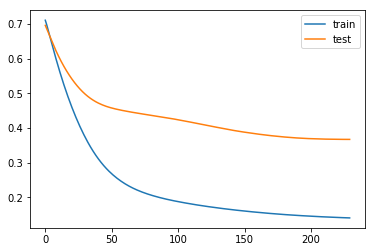

In [3]:
from keras.callbacks import EarlyStopping
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) ## patience=200
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=2000, verbose=1, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## <center> Saving and Loading Neural Networks

### <center> Model Structure and Weights Seperately

In [7]:
## saving model 
model_json = model.to_json() 
with open("model.json", "w") as json_file:
    json_file.write(model_json)
## saving weights
model.save_weights("model.h5")

In [8]:
from keras.models import model_from_json
## loading model 
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
## loading weights
loaded_model.load_weights("model.h5")
## compile model
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### <center> Model Structure and Weights Together

In [9]:
model.save('whole_model.h5')

In [11]:
from keras.models import load_model
loaded_model = load_model('whole_model.h5')
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## <center> Activity

<center> Train a neural network using the dataset generated below. Use the tuning techniques mentioned above to improve its performance.

In [32]:
from sklearn.datasets import make_classification
X,y = make_classification(n_classes=5, n_features=1000, n_informative=950, class_sep=0.90, n_samples=10000, random_state=4)

## <center> Homework

<center> Fit a neural network to your Mod 5 project dataset.